# Simple Linear Regression

In [1]:
# import basic libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid', which adds a dark grid to the background of plots.

%matplotlib inline 
# This line should be used in Jupyter notebooks to display matplotlib plots inline (within the notebook).

In [2]:
# load the dataset 
original_data = pd.read_csv('../Data/Student_Marks.csv')

# make a copy of the original data ( make a deep copy)
model_data = original_data.copy()

# let us see the top 5 rows of the data 
model_data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Description of the dataset columns 
>**number_courses** : Number of Courses Opted by the student<br/>
**time_study** : Average Time Studied per day by the student<br/>
**Marks** : Marks Obtained by the student

## Dropping a Columns
>Since I am performing a Simple Linear Regression on the above dataset, it is sufficient to have a single explanatory variable. Thus, I drop the `number_courses` column from the dataset.

In [3]:
# let us first see the names of the columns 
model_data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [4]:
# let us drop the column - number_courses - fom the dataframe 
model_data.drop(
    labels = model_data.columns[0],
    axis = 1, 
    inplace = True
)

model_data.head()


,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


## Information about the dataset

In [5]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


So, there are no null values to handle in the dataset. The dataset is clean!


In [6]:
# let us get info about the descriptive statistics of the variables 
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


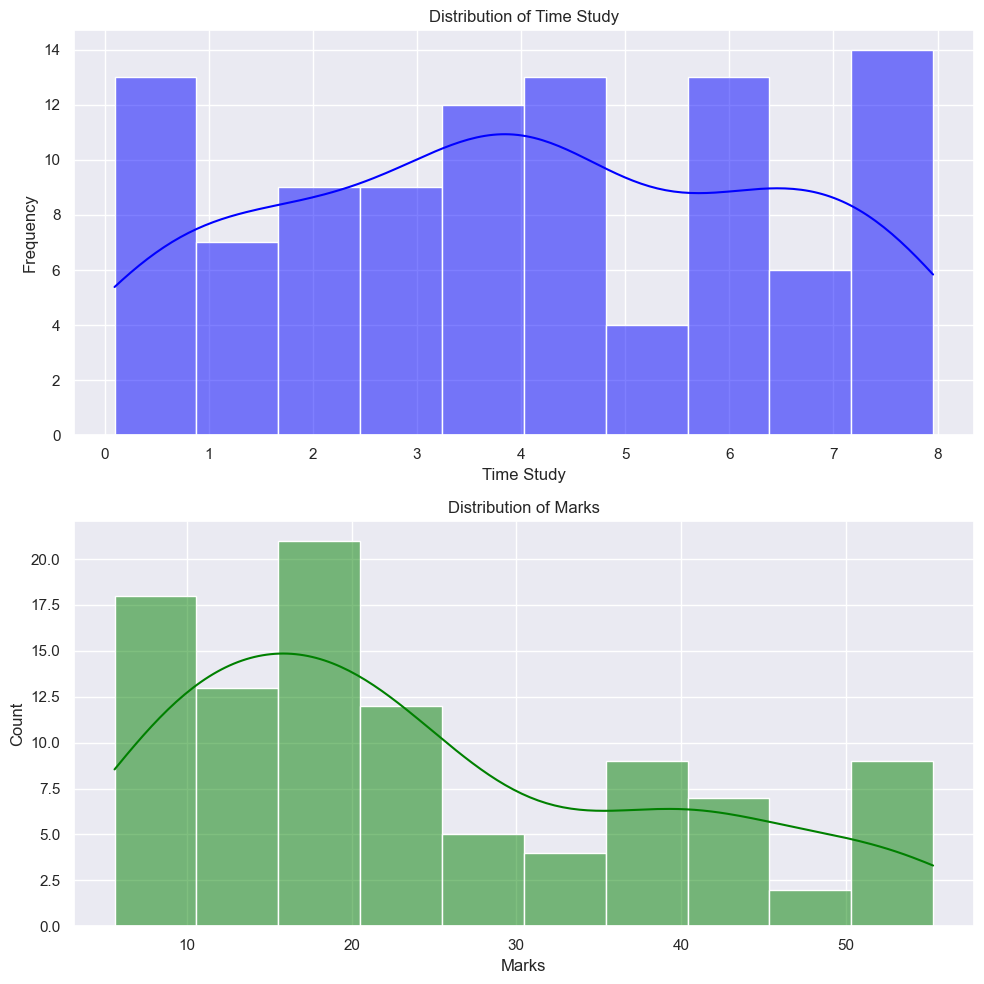

In [7]:
# let us plot the variables 
fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.histplot(model_data['time_study'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Time Study')
axes[0].set_xlabel('Time Study')
axes[0].set_ylabel('Frequency')

# Plot histogram for "Marks"
sns.histplot(model_data['Marks'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Marks')
axes[1].set_xlabel('Marks')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Based on the histograms provided for the `time_study` and `Marks` distributions:

1. **Distribution of `time_study`**:
   - The data appears somewhat uniform, with no strong central peak or evident skew.
   - The KDE curve shows a slight increase in density around 3–5, suggesting that these values occur more frequently, but the distribution overall is fairly flat.
   - This might indicate that `time_study` values are spread out relatively evenly across the range.

2. **Distribution of `Marks`**:
   - The data shows a slight left skew, with higher frequencies observed in the lower range (e.g., 10–20).
   - The KDE curve highlights a peak around 15–20, suggesting that many students scored in this range, with the frequency tapering off as the marks increase.
   - This could indicate that most students performed modestly, with fewer high scorers.

### Insights:
- The `time_study` distribution does not appear to have a strong relationship with the shape of the `Marks` distribution at a glance, suggesting the need for further analysis, such as scatter plots or regression, to check for potential correlations or patterns.

## Create a Baseline Model 

Let us now create a `BASELINE MODEL` with the target mean i.e. use the mean of the `Marks` column to predict the target variable irrespective of the value the explanatolry vriable , `time_study` takes. Next we calculate the Sum of Squared Errors (SSE) for comparison purpose.


The target mean is : 24.417689999999997


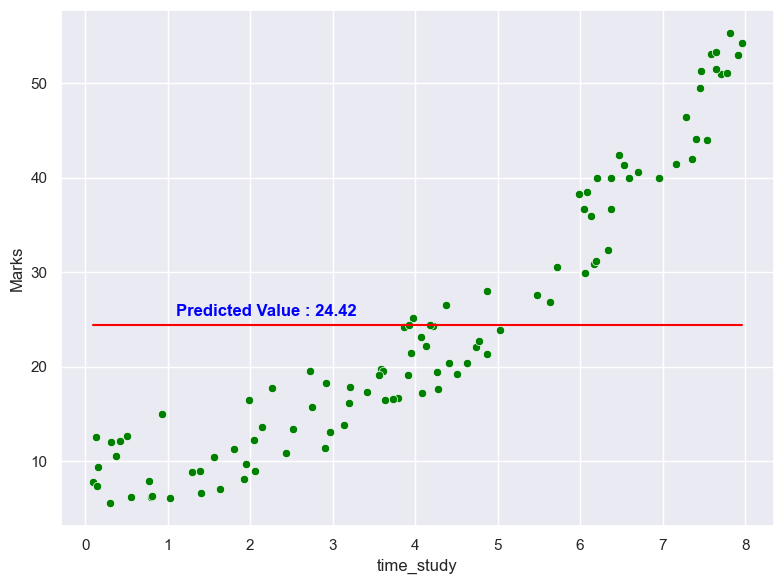

In [8]:
# first let us calculate the mean of the target 
mean_marks = np.mean(model_data['Marks'])
print(f"The target mean is : {mean_marks}")

# let us now see the prediction in a diagram 
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(data=model_data,
                x = model_data['time_study'],
                y = model_data['Marks'],
                ax = axes , 
                color = 'green')
sns.lineplot(data=model_data,
             x = model_data['time_study'],
             y = mean_marks,
             ax = axes, 
             color = 'red')
# let us annotate the line 
axes.text(x = np.min(model_data['time_study'])++1,
          y = mean_marks+1,
          s = f"Predicted Value : {mean_marks:.2f}",
          color = 'blue',
          fontsize = 12, 
          fontweight = 'bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

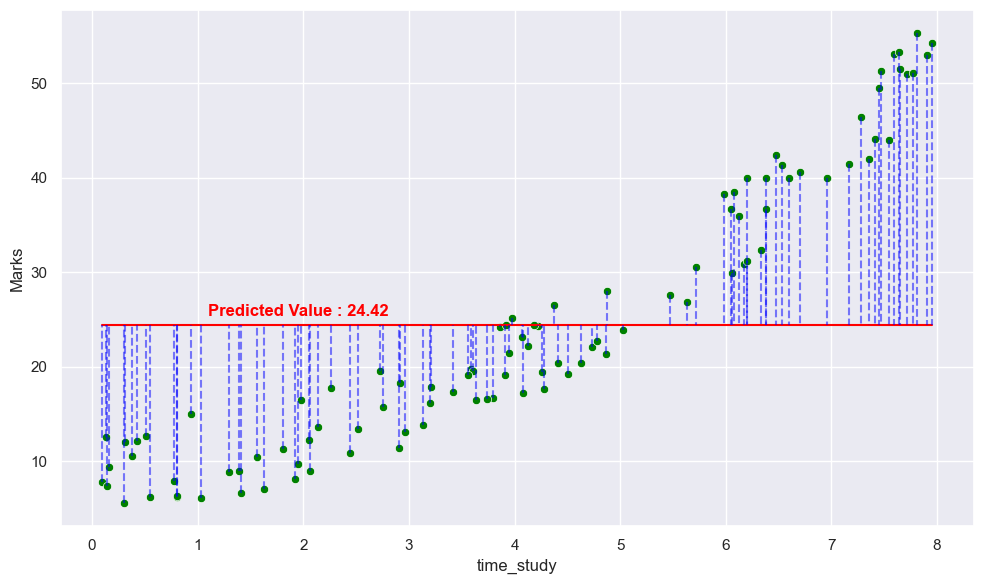

In [ ]:
# let us now visualize the SSE and calculate them 

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=model_data,
                x = model_data['time_study'],
                y = model_data['Marks'],
                ax = axes , 
                color = 'green')
sns.lineplot(data=model_data,
             x = model_data['time_study'],
             y = mean_marks,
             ax = axes, 
             color = 'red')

# Add vertical lines for errors
for _, row in model_data.iterrows():
    axes.plot([row['time_study'], row['time_study']],  # x-coordinates (fixed for each point)
            [row['Marks'], mean_marks],             # y-coordinates (actual to predicted)
            color='blue', linestyle='--', alpha=0.5)
    
# let us annotate the line 
axes.text(x = np.min(model_data['time_study'])+1,
          y = mean_marks+1,
          s = f"Predicted Value : {mean_marks:.2f}",
          color = 'red',
          fontsize = 12, 
          fontweight = 'bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
# calculate SSE 

error = model_data['Marks'] - mean_marks
SSE = np.sum(
    np.power(
        error,2
    )
)

print(f"The SSE of the Baseline Model is : {SSE}")

The SSE of the Baseline Model is : 20318.756583389997


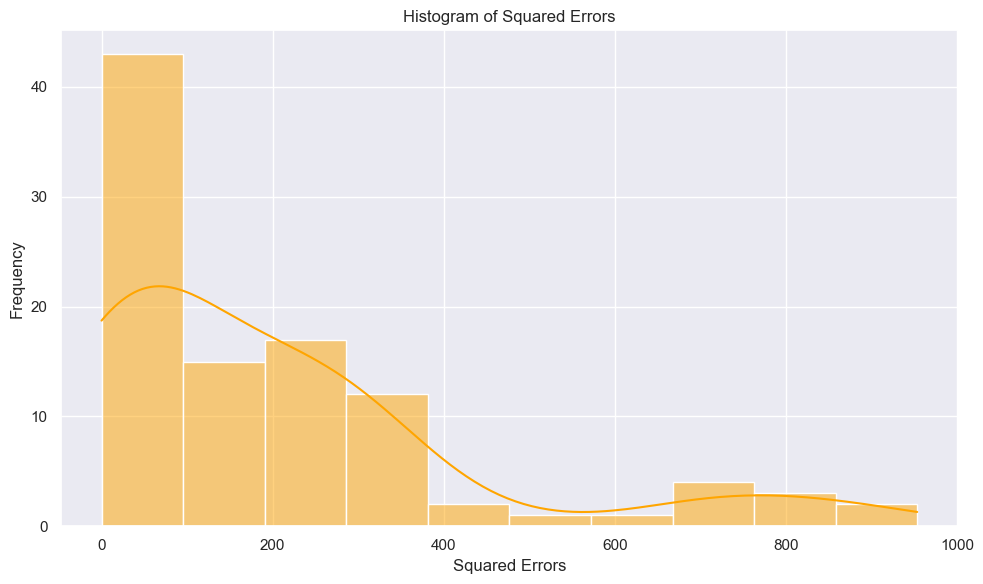

In [11]:
# let us now visualize the distribution of the squared errors 

squared_errors = np.power(error, 2)

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(
    squared_errors,
    bins = 10, 
    color = 'orange',
    kde = True,
    ax = ax
)

ax.set_xlabel('Squared Errors')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Squared Errors')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show plot
plt.show()

Thus, it is visible that there a large number of squared errors is actually between 0 and 100. This means, that the mean is not that bad a predictor! However, we also see that there exists squared errors which are quite large and these errors make the SSE large! 

So, we have some room for improvement of the Baseline model that we have created.

## Problem with the Baseline Model and its Remedy

In the Baseline Model, our prediction is actually the mean of the target variable. Thus our prediction of a changing target variable is nothing but a constant! This seems ABSURD since a CONSTANT CAN'T BE A GOOD PREDICTOR FOR A CHANGING TARGET!

What we need is a **target mean that is not fixed but is dependent on values of another variable which is related to the target** i.e. the variation in that variable is somewhere similar to that of the target.

In [12]:
# let us observe the correlation between the two variables we have 

def Covariance(x,y,bias=0): # calculates the covaraince between two variables 
    n_samples = float(x.size)
    x_mean , y_mean = np.mean(x), np.mean(y)
    cov = np.sum((x-x_mean)*(y-y_mean))/(n_samples - min(bias,1))
    return cov
    
def Standardized(x): # standardize any variable 
    x_mean = np.mean(x)
    x_std = np.std(x)
    return (x-x_mean)/x_std

def Correlation(x,y,bias=0): # calculates the correlation between the two variables 
    return Covariance(Standardized(x),
                      Standardized(y),
                      bias)

x = model_data['time_study']
y = model_data['Marks']
print(f'The correlation between time_study and Marks is : {Correlation(x,y)}')

The correlation between time_study and Marks is : 0.9422538903640542


In [13]:
# this is actually, the perason correlation coeff

from scipy.stats import pearsonr

# pearson corr coeff. 

x = model_data['time_study']
y = model_data['Marks']

pearsonr(
    x,
    y
)

PearsonRResult(statistic=np.float64(0.9422538903640539), pvalue=np.float64(2.355657179844169e-48))

So, we see that the variables `time_study` and `Marks` have a high correlation. Thus, it can be suggested that they have a strong linear relation between them. 

## Fit a Linear Model 

In [124]:
# first, let us use the OLS method to fit the linear model to our data 

# let us take the explanatory variable and the target variable and convert them to NumPy
x = model_data['time_study'].to_numpy()
y = model_data['Marks'].to_numpy()

# let us find the respective means 
x_mean = np.mean(x)
y_mean = np.mean(y)

# based on the OLS estimate of the parameters 
s_xy = np.sum((x-x_mean)*(y-y_mean))
s_xx = np.var(x) * len(x) # same as np.sum(np.power((x-x_mean),2))

b_1 = s_xy/s_xx
b_0 = y_mean - b_1 * x_mean

print(f'The OLS estimates are - Intercept : {b_0} ; Slope : {b_1} ')

# let us capture the predictions
y_pred = b_0 + b_1 * x
print(f"The predictions are :\n{y_pred}")

The OLS estimates are - Intercept : 1.22385810750297 ; Slope : 5.688750421250442 
The predictions are :
[26.86874501  1.76997815 19.04671318 46.21618519 45.65868765 19.49043571
 35.71475191 20.6395633  26.31124747 36.34051446 43.05323995  3.63019954
 25.21900738 25.53757741 17.76674433 25.4579349  33.75782177 35.81146067
 45.08981261 23.84801853 28.14871385 36.07314319 12.89148522 28.95651641
 21.90246589  9.22792995  4.11374332 26.12920745  2.11130317  8.6135449
 23.20518974 12.16332517  6.5257735  38.73547839 24.45102608 44.13410253
 18.09669186 42.65502743 38.38846461 45.45389263  2.02028317 16.89067677
 21.65216087 10.08124251 12.33967643 12.94837273 22.82404346 28.41039637
 33.27996673 23.48393851 39.35555218 24.71839735  5.60988468 35.63510941
 44.40716256 17.79518808 44.69160008 44.73711008 36.48273322 43.70744625
  3.36282827 15.09303163 21.73749213 28.92238391  1.96339566 13.40916151
 32.35838916  4.35267084  9.15966495 23.68304477 22.47702968 15.54813167
 27.57983881 10.49083

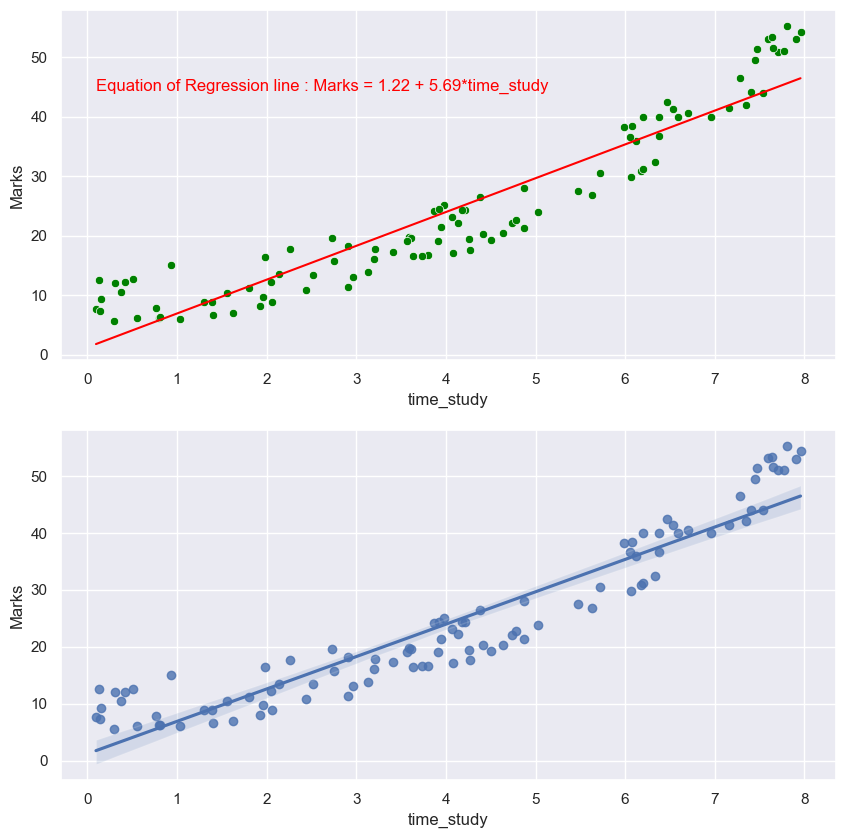

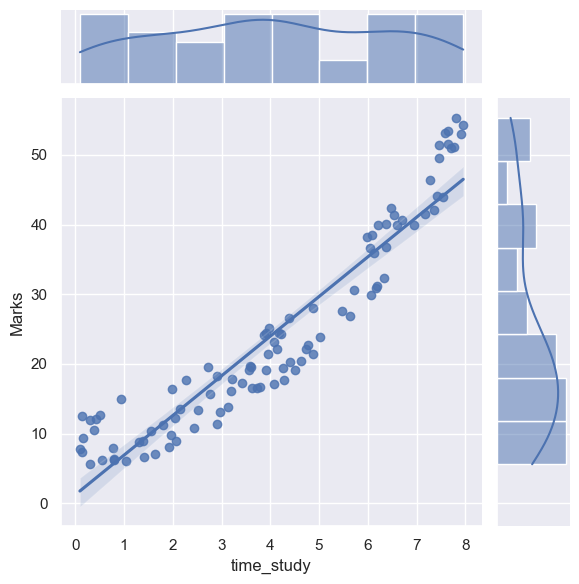

In [71]:
# let us visualize the regression line 

# first let us do a scatter plot as above 
fig, axes = plt.subplots(2,1 ,figsize=(10,10))
sns.scatterplot(data=model_data,
                x = model_data['time_study'],
                y = model_data['Marks'],
                ax = axes[0] , 
                color = 'green')

# before we do the lineplot let us for a data frame whcih consists of the predictions 
model_pred = pd.DataFrame({'time_study': x, 'Marks_pred': y_pred})

sns.lineplot(data=model_pred,
             x = model_pred['time_study'],
             y = model_pred['Marks_pred'],
             ax = axes[0],
             color = 'red')

# annotate 
axes[0].text(x = np.min(model_data['time_study']),
        y = mean_marks+20,
        s = f"Equation of Regression line : Marks = {b_0:.2f} + {b_1:.2f}*time_study",
        color = 'red',
        fontsize = 12)

# let us also use the replot od sns 
sns.regplot(data=model_data , x = 'time_study', y = 'Marks', ax=axes[1])

# now use a jointplot to do the same - note jointplot is a figure-level function like lmplot - hence no ax 
sns.jointplot(x='time_study', y='Marks', data=model_data, kind="reg")

### What about the Residuals? 
Let us try to visualize how the residuals are distruibuted once the model is fit.

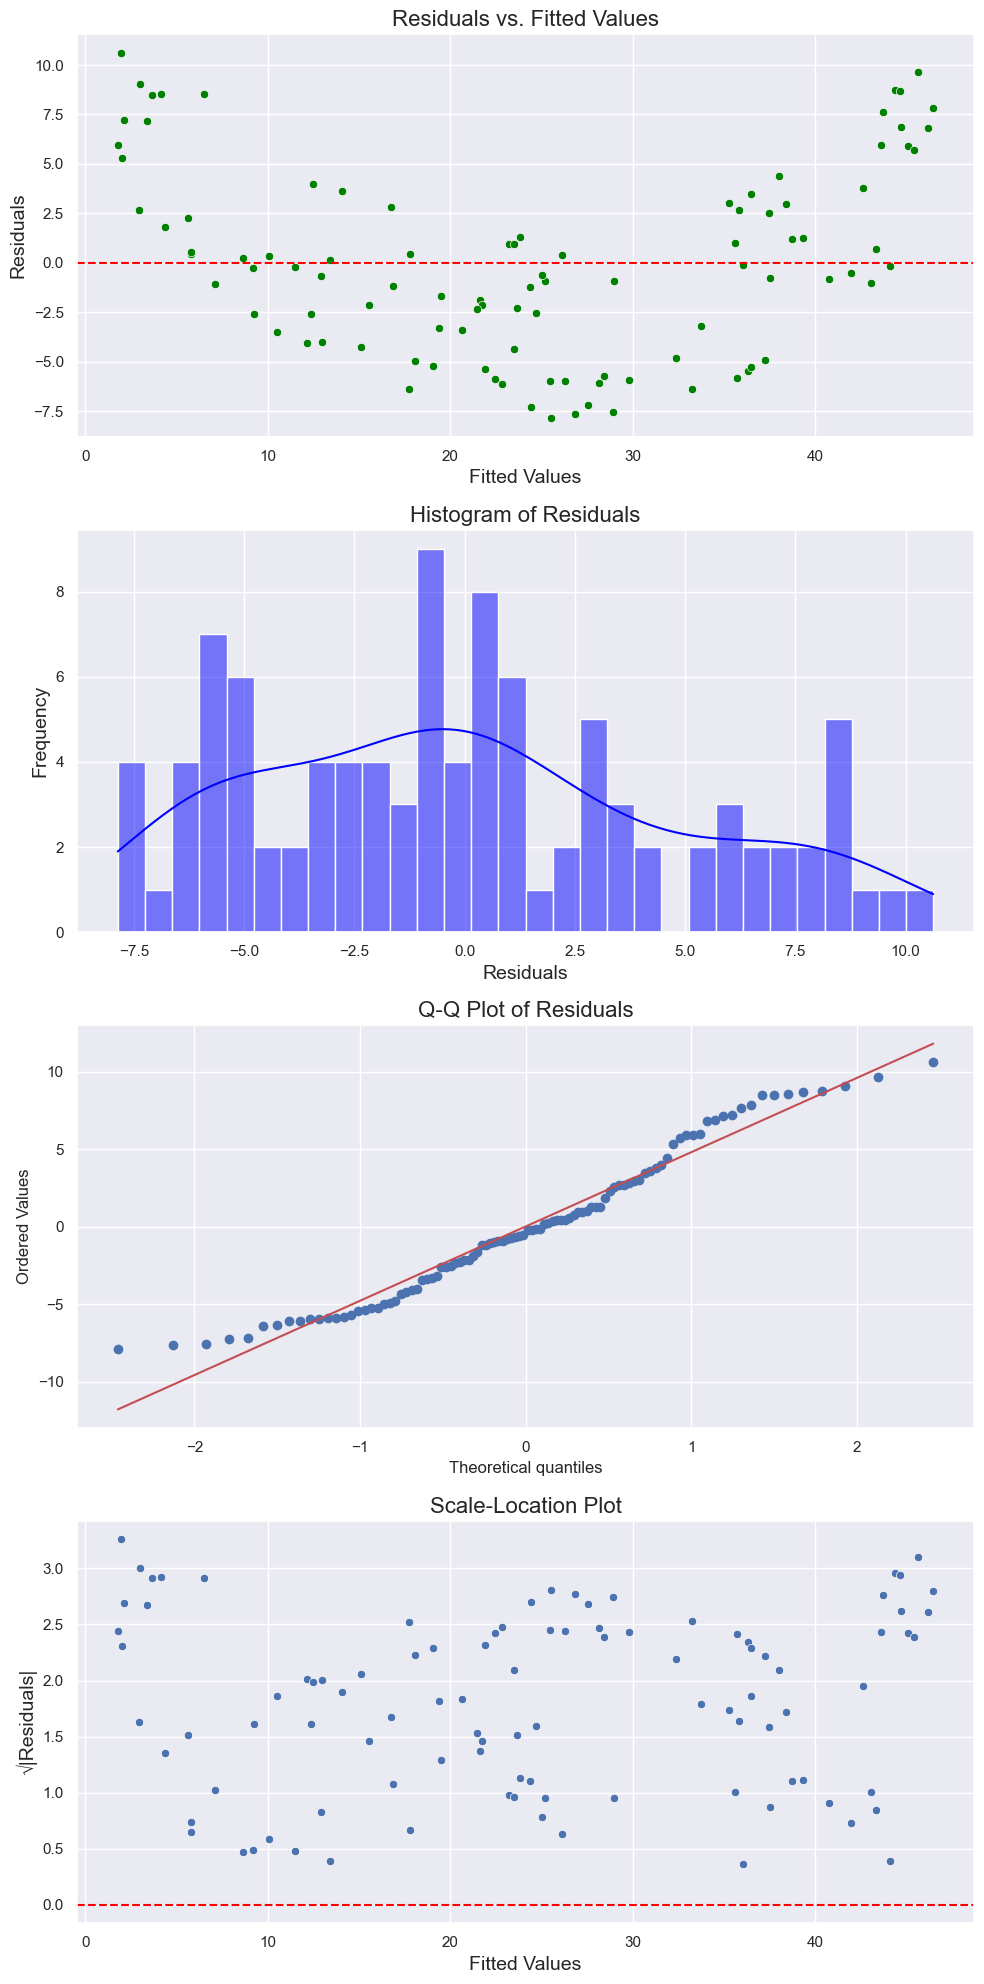

In [91]:
# residuals e 
e = y - y_pred 

# let us check randomness - Residual vs Fitted Values plot 
fig, axes = plt.subplots(4, 1, figsize=(10,20))
sns.scatterplot(x = y_pred,
                y = e,
                ax = axes[0] , 
                color = 'green')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuals vs. Fitted Values", fontsize=16)
axes[0].set_xlabel("Fitted Values", fontsize=14)
axes[0].set_ylabel("Residuals", fontsize=14)

# let us now check the distribution of the residuals 
sns.histplot(e, kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title("Histogram of Residuals", fontsize=16)
axes[1].set_xlabel("Residuals", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Q-Q plot - to check if the residuals are normally distributed - i.e. they should lign themselves with the diagonal line 
from scipy import stats

stats.probplot(e, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot of Residuals", fontsize=16)

# Scale - Location Plot (spread v/s Fitted values)- to check whether the residuals are homoskedastic(constant variane) - i.e. residuals should have a uniform spread across the fitted values
# Square root of absolute residuals
sqrt_abs_e = np.sqrt(np.abs(e))

# Scale-Location Plot
sns.scatterplot(x=y_pred, y=sqrt_abs_e)
axes[3].axhline(0, color='red', linestyle='--')
axes[3].set_title("Scale-Location Plot", fontsize=16)
axes[3].set_xlabel("Fitted Values", fontsize=14)
axes[3].set_ylabel("√|Residuals|", fontsize=14)

plt.tight_layout()

The diagnostic plots shown in the image provide insights into the performance and assumptions of a regression model. Below is the interpretation of each plot:

---

#### **1. Residuals vs. Fitted Values Plot (Top Plot)**

- **Purpose**: To check if residuals show a random scatter around the horizontal axis, which indicates that the relationship between predictors and response is correctly modeled.
- **Observations**:
  - Residuals are not evenly spread; instead, they appear to have a systematic pattern (e.g., a curve or fan shape).
  - This suggests the model might not fully capture the relationship between predictors and response, or there may be **non-linearity** in the data.
  - Additionally, the spread of residuals increases with fitted values, hinting at **heteroscedasticity** (non-constant variance).

---

#### **2. Histogram of Residuals (Second Plot)**

- **Purpose**: To assess the normality of residuals.
- **Observations**:
  - The histogram shows some symmetry but also notable deviations from a perfect bell curve.
  - This suggests that the residuals may not be perfectly normally distributed, which is a key assumption in regression.

---

#### **3. Q-Q Plot of Residuals (Third Plot)**

- **Purpose**: To further evaluate the normality of residuals.
- **Observations**:
  - Most points lie on the red diagonal line, indicating that residuals are approximately normally distributed.
  - However, there are deviations at both ends (tails), suggesting potential **outliers** or heavy-tailed distribution.

---

#### **4. Scale-Location Plot (Spread-Location Plot, Bottom Plot)**

- **Purpose**: To check the homoscedasticity (constant variance of residuals).
- **Observations**:
  - The spread of the residuals (√|Residuals|) increases as the fitted values increase, forming a "fan-shaped" pattern.
  - This confirms **heteroscedasticity**, meaning the variance of residuals is not constant.
  - The violation of this assumption may affect the reliability of statistical tests and confidence intervals.

---

#### **Overall Conclusions**
1. **Non-Linearity**:
   - The pattern in the Residuals vs. Fitted Values plot suggests that the model does not adequately capture the underlying relationship. Consider adding polynomial terms, interaction terms, or other transformations to improve fit.

2. **Non-Normality**:
   - The histogram and Q-Q plot indicate slight deviations from normality, which may affect predictions or hypothesis tests.

3. **Heteroscedasticity**:
   - Both the Residuals vs. Fitted Values and Scale-Location plots reveal heteroscedasticity. This can be addressed by:
     - Applying transformations to the dependent variable (e.g., logarithmic or square root).
     - Using robust standard errors or weighted least squares regression.

#### NOTE
We will come back and do the above analysis in a bit of depth when we discuss the `Model Adequacy`. The residuals(e) play a very important role to determine the adequacy of the model!

### Properties of Least Square Estimators and Fitted Regression Model 

1. The slope and intercept are a linear combination of the target values 

In [94]:
print(f"The slope is : {b_1}")

x = model_data['time_study'].to_numpy()
x_mean = np.mean(x)
centered_x = x - x_mean
s_xx = np.var(x) * len(x)

# define a new variable c 
c = centered_x / s_xx

y = model_data['Marks'].to_numpy()

# define a variable slope as linear combination of the target values 
slope = np.dot(c,y) 

print(f"The slope is : {slope}")


The slope is : 5.688750421250442
The slope is : 5.688750421250442


Since intercept is a linear combination of the slope, it cleary states that intercept too is a linear combination of the target values.

2. The estimators are unbiased in nature 

In [125]:
import statsmodels.api as sm

def sample_regression():
    # generate a sequence of random 80 integers between 0 and 100
    random_80 = np.random.randint(0, 100, 80)

    # select the rows with the given index - random_80
    sample = model_data.iloc[random_80]

    # fit the regression model

    y = sample['Marks']
    x = sample['time_study']
    X = sm.add_constant(x) # adds a constant 1.0 to every row - intercept

    # create model 
    linear_regression = sm.OLS(y, X)

    # fit the model
    fitted_model = linear_regression.fit()

    # parameters 
    beta_0, beta_1 = np.array(fitted_model.params)[0], np.array(fitted_model.params)[1]
    return beta_0, beta_1

# collect all the sample params
B_0, B_1 = [],[]
for _ in range(1000):
    beta_0, beta_1 = sample_regression()
    B_0.append(beta_0)
    B_1.append(beta_1)
    
# average them 
print(f"The average of the 100 intercepts is : {np.average(B_0)}")
print(f"The original intercept is : {b_0}")
print(f"The average of the 100 slopes is : {np.average(B_1)}")
print(f"The original slope is : {b_1}")

The average of the 100 intercepts is : 1.196873468490641
The original intercept is : 1.22385810750297
The average of the 100 slopes is : 5.6823842636375845
The original slope is : 5.688750421250442


As is visible, the average of the parameters is actually very close to the original params. Thus the parameters can be considered to be unbiased!

3. Variance of slope in inversely proportional to the variance of the explanatory variables.                                                             

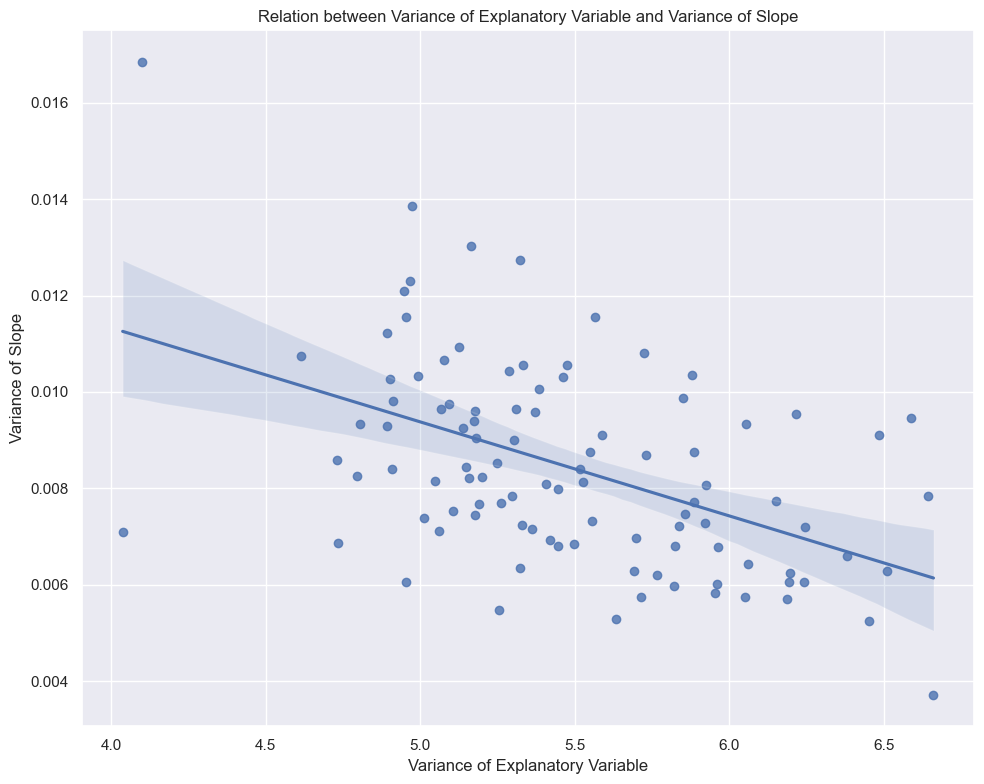

In [133]:
import random  # Importing the random module for random sampling.

var_x, var_b_1 = [], []  # Initializing empty lists to store variances of x and slopes.

for _ in range(100):  # Outer loop to repeat the process 100 times.
    B_1 = []  # Initialize an empty list to store slopes for this iteration.

    # Generate 90 random indices between 0 and 100.
    random_90 = np.random.randint(0, 100, 90)

    # Select rows based on random indices and calculate variance of x (time_study).
    x = model_data['time_study'].iloc[random_90]
    var_x.append(np.var(x))  # Append variance of x to the var_x list.

    for _ in range(100):  # Inner loop to repeat the process 100 times for each outer iteration.
        # Select 80 random indices from the 90 previously selected indices.
        selected_80 = random.sample(list(random_90), 80)

        # Extract rows for the selected 80 indices.
        sample = model_data.iloc[selected_80]
        y = sample['Marks']  # Dependent variable (target).
        x = sample['time_study']  # Explanatory variable (predictor).

        # Add a constant column to x for the intercept in the linear regression.
        X = sm.add_constant(x)

        # Create and fit the OLS (Ordinary Least Squares) regression model.
        linear_regression = sm.OLS(y, X)  # Define the model.
        fitted_model = linear_regression.fit()  # Fit the model to the data.

        # Extract model coefficients: beta_0 (intercept) and beta_1 (slope).
        beta_0, beta_1 = np.array(fitted_model.params)[0], np.array(fitted_model.params)[1]

        B_1.append(beta_1)  # Append the slope (beta_1) to the B_1 list.

    # Calculate variance of the slopes and append it to var_b_1.
    var_b_1.append(np.var(B_1))

# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(10, 8))

# Create a regression plot of variance of x (var_x) vs. variance of slope (var_b_1).
sns.regplot(x=var_x, y=var_b_1, ax=ax)

# Add a title and labels to the plot.
ax.set_title("Relation between Variance of Explanatory Variable and Variance of Slope")
ax.set_xlabel("Variance of Explanatory Variable")
ax.set_ylabel("Variance of Slope")

plt.tight_layout()  # Adjust layout for better visualization.


4. Sum of Residuals must be zero
5. The sum of residuals weighted by its corresponding value of regressor variable is zero

In [ ]:
# let us use another way of fitting the same regression model and take the sum of the residuals 

import statsmodels.formula.api as smf

y = model_data['Marks']
x = model_data['time_study']

# create the model 
linear_regression = smf.ols(formula = 'Marks ~ time_study',
                            data = model_data)

# fit the model
fitted_model = linear_regression.fit()

# predicted values 
y_pred = fitted_model.predict(x)

# residuals 
e = y - y_pred 

print(f"The sum of the residuals is :{np.sum(e):.5f}") # first normal equation
print(f"The sum of the actual target values : {np.sum(y):.5f}")
print(f"The sum of the predicted target values : {np.sum(y_pred):.5f}")
print(f"The sum of residuals weighted by its corresponding value of regressor variable is : {np.dot(x,e):.5f}") # second normal equation


The sum of the residuals is :-0.00000
The sum of the actual target values : 2441.76900
The sum of the predicted target values : 2441.76900
The sum of residuals weighted by its corresponding value of regressor variable is : -0.00000


## Further Analysis of the Linear Regression Model

In [143]:
y = model_data['Marks']
x = model_data['time_study']
X = sm.add_constant(x)

linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

# parameters 
beta_0, beta_1 = np.array(fitted_model.params)[0],np.array(fitted_model.params)[1]

# let us now look at the summary
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           2.36e-48
Time:                        19:47:21   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here is an explanation of each part of the **OLS Regression Results**:

---

#### **Header Information:**
1. **Dep. Variable:**  
   - The dependent variable (target) is `Marks`. This is the variable we are trying to predict using the regression model.

2. **Model:**  
   - The model used is **OLS** (Ordinary Least Squares), a common method for linear regression.

3. **Method:**  
   - The method of estimation is **Least Squares**, which minimizes the sum of squared residuals (differences between observed and predicted values).

4. **Date and Time:**  
   - The date (`Wed, 25 Dec 2024`) and time (`19:47:21`) indicate when the regression was run.

5. **No. Observations:**  
   - There are **100 observations** (data points) in the dataset used for the regression.

---

#### **Metrics:**
6. **R-squared:**  
   - **0.888**: This indicates that 88.8% of the variation in `Marks` (dependent variable) is explained by the predictor `time_study`. Higher values closer to 1 indicate a better fit.

7. **Adj. R-squared (Adjusted R-squared):**  
   - **0.887**: This adjusts the R-squared value for the number of predictors and sample size. It slightly penalizes the model if additional predictors do not improve the model significantly. Since there’s only one predictor, it’s very close to the R-squared value.

8. **F-statistic:**  
   - **775.8**: This is the overall test statistic for the significance of the regression model. A higher value indicates a stronger relationship between the predictor(s) and the dependent variable.

9. **Prob (F-statistic):**  
   - **2.36e-48**: The p-value associated with the F-statistic. A very small p-value (close to 0) suggests that the model is statistically significant (i.e., the predictor(s) are relevant).

10. **Log-Likelihood:**  
    - **-298.21**: The log of the likelihood function. This is used internally for model comparison (e.g., AIC, BIC).

11. **AIC (Akaike Information Criterion):**  
    - **600.4**: A measure of the model's quality, balancing goodness of fit with model complexity. Lower values indicate better models.

12. **BIC (Bayesian Information Criterion):**  
    - **605.6**: Similar to AIC but penalizes model complexity more heavily. Lower values are preferred.

13. **Df Model:**  
    - **1**: The degrees of freedom for the model, which is the number of predictors (in this case, 1: `time_study`).

14. **Df Residuals:**  
    - **98**: The degrees of freedom for the residuals, which is the number of observations minus the number of estimated parameters (100 - 2 = 98).

15. **Covariance Type:**  
    - **nonrobust**: Indicates that the standard errors and covariance are not adjusted for heteroscedasticity (non-constant variance).

---

#### **Coefficients Table:**

16. **const (Intercept):**  
    - **1.2239**: The intercept of the regression line. When `time_study` is 0, the predicted `Marks` value is 1.2239.  

17. **time_study (Slope):**  
    - **5.6888**: The slope of the regression line. For every 1 unit increase in `time_study`, the `Marks` are predicted to increase by 5.6888 units.

18. **std err:**  
    - **0.962** (for `const`) and **0.204** (for `time_study`): The standard errors of the coefficients, representing the variability in the coefficient estimates.

19. **t (t-statistic):**  
    - **1.272** (for `const`) and **27.853** (for `time_study`): The t-statistics test whether the coefficients are significantly different from 0. A higher absolute value indicates stronger evidence that the coefficient is significant.

20. **P>|t| (p-value):**  
    - **0.206** (for `const`) and **0.000** (for `time_study`): The p-value tests whether the coefficients are significantly different from 0. For `time_study`, the p-value is effectively 0, meaning it is highly significant.

21. **[0.025, 0.975] (Confidence Interval):**  
    - The 95% confidence interval for the coefficients. For `time_study`, the true slope is estimated to lie between 5.283 and 6.094.

---

#### **Diagnostic Tests:**
22. **Omnibus:**  
    - **7.504**: A test for the normality of residuals. Higher values indicate deviation from normality.

23. **Prob(Omnibus):**  
    - **0.023**: The p-value for the Omnibus test. A value less than 0.05 indicates significant deviation from normality.

24. **Jarque-Bera (JB):**  
    - **4.633**: Another test for normality of residuals based on skewness and kurtosis.

25. **Prob(JB):**  
    - **0.0986**: The p-value for the JB test. Since it’s greater than 0.05, the residuals do not significantly deviate from normality.

26. **Skew:**  
    - **0.357**: The asymmetry of the residuals. A value close to 0 indicates symmetry.

27. **Kurtosis:**  
    - **2.225**: The "tailedness" of the residuals. A value of 3 indicates normal kurtosis, while less than 3 indicates lighter tails.

28. **Durbin-Watson:**  
    - **1.757**: A test for autocorrelation in residuals. Values close to 2 indicate no autocorrelation.

29. **Cond. No (Condition Number):**  
    - **9.72**: A measure of multicollinearity. Values greater than 30 indicate potential multicollinearity issues, but 9.72 is acceptable.

---

#### Summary:
This regression model is a good fit (R-squared = 88.8%), with the predictor `time_study` being highly significant in predicting `Marks`. The diagnostic tests show acceptable normality and no major issues with multicollinearity or autocorrelation.

In [151]:
# Let us calculate the standard errors from scratch

x_mean = np.mean(x)
y_mean = np.mean(y)

y_pred = fitted_model.predict(X)
residuals = fitted_model.resid

# Calculate Residual Sum of Squares (SSE) and Total Sum of Squares (SST)
SST = np.sum((y - y_mean) ** 2)  # Total Sum of Squares
SSE = np.sum(residuals ** 2)  # Residual Sum of Squares
SSR = SST - SSE  # Regression Sum of Squares

# Degrees of freedom
df_model = 1  # One predictor
df_residual = len(x) - 2  # n - (k + 1), where k = 1 predictor

# Mean Square Errors
MSR = SSR / df_model  # Mean Square for Regression
MSE = SSE / df_residual  # Mean Square for Residuals

# calculate the standard errors 
s_xx = np.sum((x-x_mean)**2)
se_slope = np.sqrt(MSE/s_xx)
se_intercept = np.sqrt(MSE*((1/len(x)) + (x_mean**2/s_xx)))
print(f"The SE of the slope is : {se_slope}")
print(f"The SE of the intercept is : {se_intercept}")

The SE of the slope is : 0.2042444523489022
The SE of the intercept is : 0.9622815382207089


In [153]:
# let us now calculate the t-statistic and F-statistic values 

# Calculate the F-statistic
F_statistic = MSR / MSE

# Step 4: Calculate the t-statistics for beta_0 (intercept) and beta_1 (slope)
# Standard error of the regression
SE_residual = np.sqrt(MSE)

# Standard error of beta_1
SE_beta_1 = SE_residual / np.sqrt(np.sum((x - x_mean) ** 2))

# Standard error of beta_0
SE_beta_0 = SE_residual * np.sqrt(1/len(x) + x_mean**2 / np.sum((x - x_mean) ** 2))

# t-statistics
t_beta_1 = beta_1 / SE_beta_1
t_beta_0 = beta_0 / SE_beta_0

# Display the results
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")
print(f"Total Sum of Squares (SST): {SST}")
print(f"Residual Sum of Squares (SSE): {SSE}")
print(f"Regression Sum of Squares (SSR): {SSR}")
print(f"Mean Square for Regression (MSR): {MSR}")
print(f"Mean Square for Residuals (MSE): {MSE}")
print(f"F-statistic: {F_statistic}")
print(f"t-statistic for beta_0 (intercept): {t_beta_0}")
print(f"t-statistic for beta_1 (slope): {t_beta_1}")

Intercept (beta_0): 1.223858107502967
Slope (beta_1): 5.688750421250447
Total Sum of Squares (SST): 20318.756583389997
Residual Sum of Squares (SSE): 2278.9030971957623
Regression Sum of Squares (SSR): 18039.853486194235
Mean Square for Regression (MSR): 18039.853486194235
Mean Square for Residuals (MSE): 23.254113236691452
F-statistic: 775.7704326359816
t-statistic for beta_0 (intercept): 1.2718295622359357
t-statistic for beta_1 (slope): 27.85265575552864


### Correlation IS NOT Causation

Actually, seeing a correlation between your predictor and your target
variable,and managing to model it successfully using a linear regression, doesn't really mean that there is a **causal relation** between the two (though your regression may work very well, and even optimally).

Though using a data science approach, instead of a statistical one, will guarantee a certain efficacy in your model, it is easy to fall into some mistakes when having no clue why your target variable is correlated with a predictor.

Let us see about six different reasons, and offer a cautionary word to help you handle such predictors without difficulty:
>**Direct causation**:x causes y; for instance, in the real estate business the value is directly proportional to the size of the house in square meters.

>**Reciprocal effects**: x causes y but it is also influenced by y. This is quite typical of many macro-economic dynamics where the effect of a policy augments or diminishes its effects. As an example in real estate, high crime rates in an area can lower its prices but lower prices mean that the area could quickly become even more degraded and dangerous.

>**Spurious causation**: This happens when the real cause is actually z, which causes both x and y; consequently it is just a fallacious illusion that x implies y because it is z behind the scenes. For instance, the presence of expensive art shops and galleries may seem to correlate with house prices; in reality, both are determined by the presence of affluent residents.

>**Indirect causation**:x in reality is not causing y but it is causing something else,which then causes y. A good municipality investing in infrastructures after higher taxes can indirectly affect house prices because the area becomes more comfortable to live in, thus attracting more demand. Higher taxes, and thus more investments, indirectly affect house prices.

>**Conditional effect**: x causes y in respect of the values of another variable z; for instance, when z has certain values x is not influencing y
but, when z takes particular values, the x starts impacting y. We also call this situation **interaction**. For instance the presence of schools in an area can become an attractor when the crime rate is low, so it affects house prices only when there is little criminality.

>**Random effect** : Any recorded correlation between x and y has been due to a lucky sampling selection; in reality there is no relationship with y at all.

The ideal case is when you have a **direct causation**; then, you will have a predictor in your model that will always provide you with the best values to derive your responses.

In the other cases, **it is likely that the imperfect cause-effect relationship with the target variable will lead to more noisy estimates, especially in production when you will have to work with data not seen before by the model**

**Reciprocal effects are more typical of econometric models.** They require special types of regression analysis. Including them in your regression analysis may improve your model; however, their role may be underestimated.

**Spurious and indirect causes will add some noise to your x and y** relationship; this could bring noisier estimates (larger standard errors). Often, the solution is to **get more observations** for your analysis.

**Conditional effects, if not caught, can limit your model's ability to produce accurate estimates.** If you are not aware of any of them, given your domain knowledge of the problem, it is a good step to check for any of them using some automatic procedure to test possible interactions between the variables.

**Random effects are the worst possible thing that could happen to your model**, but they are easily avoided if you follow the data science procedure that we will later discuss i.e., Achieving Generalization , when we deal with all the ac-tions necessary to validate your model's results.

## Using Gradient Descent to solve Linear Regression Problem

As an alternative to the usual classical optimization algorithms, the gradient descent technique is able to minimize the cost function of a linear regression analysis using far fewer computations. Gradient descent complexity ranks in the order $O(n*p)$, thus making learning regression coefficients feasible even in the occurrence of a large $n$ (which stands for the number of observations) and a large $p$ (number of variables).


The method works by leveraging a simple heuristic that gradually converges on the optimal solution starting from a random one. Explaining it simply, it resembles **walking blind in the mountains**. If you want to descend to the lowest valley,even if you don't know and can't see the path, you can proceed approximately by going downhill for a while, then stopping, then going downhill again and so on,always aiming at each stage for where the surface descends until you arrive at apoint when you cannot descend anymore. Hopefully, at that point you will have reached your destination.


In such a situation, your only risk is happening on an intermediate valley (where there is a wood or a lake, for instance) and mistaking it for your desired arrival because the land stops descending there.


In an optimization process, such a situation is defined as a **local minimum(whereas your target is a global minimum instead, the best minimum possible)** and it is a possible outcome of your journey downhill depending on the function you are working on minimizing. **The good news is, in any case, that the error function of the linear model family is a bowl-shaped one (technically our cost function is a concave one) and it is unlikely that you can get caught anywhere if you descend properly.**
